In [2]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import keras.backend as K
import cv2

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

pip install shap

In [3]:
!pip install tensorflowjs

In [4]:
import tensorflowjs as tfjs

In [5]:
# Charger le modèle*
model = load_model("/kaggle/input/bootstrap-data/ModelSjogrenn(2).h5")

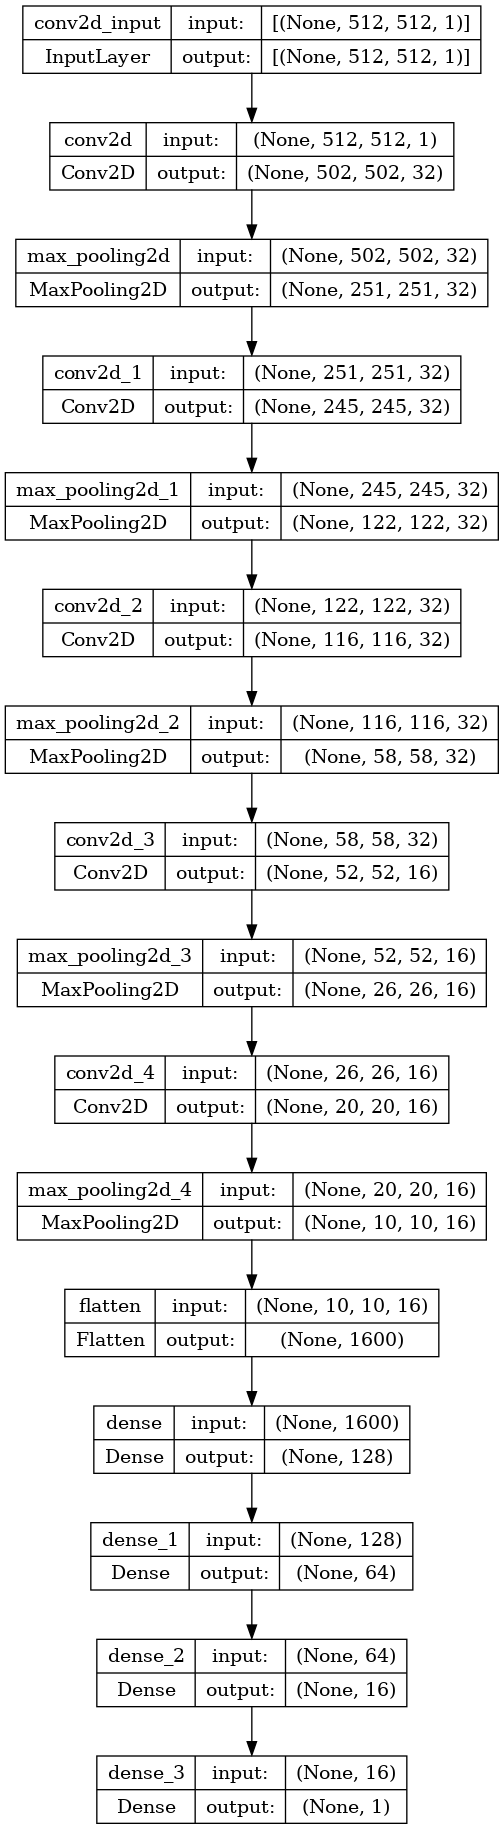

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
tfjs.converters.save_keras_model(model, 'SSmodel')

In [8]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [9]:
x=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")
y=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")

In [10]:
pred=model.predict(x)

23/23 [==============================] - 7s 59ms/step


In [11]:
pred

array([[1.00000000e+00],
       [2.55969844e-05],
       [2.95711428e-10],
       [5.22374603e-06],
       [5.44002503e-02],
       [9.99999881e-01],
       [2.55981375e-10],
       [1.00000000e+00],
       [9.99999285e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99997139e-01],
       [9.99999523e-01],
       [2.85297528e-08],
       [1.08427898e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.69886935e-01],
       [9.99980330e-01],
       [7.18843134e-04],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998212e-01],
       [2.11333898e-07],
       [1.00000000e+00],
       [3.98277416e-06],
       [1.00000000e+00],
       [9.99792278e-01],
       [4.52013671e-09],
       [9.97610217e-10],
       [1.00000000e+00],
       [2.68981978e-07],
       [9.73965287e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.95137870e-01],
       [1.00000000e+00],
       [9.99998689e-01],
       [1.21400801e-04],
       [9.99995232e-01],


In [14]:
from PIL import Image
path1="/kaggle/input/sjdata/DATA_(512,512)/sj_data/020.jpg"
path2="/kaggle/input/sjdata/DATA_(512,512)/nsj_data/004.jpg"


In [16]:
image1=Image.open("/kaggle/input/sjdata/DATA_(512,512)/sj_data/020.jpg")

img1=np.array(image1)
img1 = np.expand_dims(img1, axis=0)
img1 = np.expand_dims(img1, axis=-1)
img1 = img1.reshape(img1.shape[0], 512,512,1).astype('float32') / 255
pred0=model.predict(img1)
pred0

1/1 [==============================] - 0s 19ms/step


array([[0.9999995]], dtype=float32)

In [92]:
def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [106]:
import os
import numpy as np
from skimage.io import imread

def mise_tenseur_single_image(path, nl, nc, pl):
    img = imread(path)
    tenseur = np.empty((1, nl, nc, pl), dtype=np.uint8)
    tenseur[0, :, :, 0] = img
    return tenseur

In [107]:
im=mise_tenseur_single_image(path2,512,512,1)

In [108]:
im = im.reshape(im.shape[0], 512,512,1).astype('float32') / 255

In [109]:
pred2=model.predict(im)

1/1 [==============================] - 0s 19ms/step


In [110]:
pred2

array([[3.038607e-05]], dtype=float32)

In [28]:
im=x[1]

In [30]:
im1 = np.expand_dims(im, axis=0)


In [31]:

im1.shape

(1, 512, 512, 1)

In [32]:
pred1=model.predict(im1)

1/1 [==============================] - 0s 123ms/step


In [33]:
pred1

array([[1.2472148e-15]], dtype=float32)

In [18]:
pred1=model.predict(im)

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node sequential/conv2d/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_1831]

## imagess_net

In [ ]:
import torch, torchvision
from torch import nn
from torchvision import transforms, models, datasets

In [ ]:

X,y = shap.datasets.imagenet50()

X /= 255

to_explain = X[40]

In [ ]:
# Resize the images to (512, 512)
resized_X = []
for image in X:
    resized_image = cv2.resize(image, (512, 512))
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    reshaped_image = np.expand_dims(grayscale_image, axis=2)
    resized_X.append(reshaped_image)

# Convert the resized images to a numpy array
reshaped_X = np.array(resized_X)

# Normalize the pixel values
reshaped_X = reshaped_X / 255.0

In [ ]:
reshaped_X.shape

In [ ]:
to_explain.shape

In [ ]:
# Convert the resized image to grayscale
gray_image = cv2.cvtColor(to_explain, cv2.COLOR_BGR2GRAY)



In [ ]:
gray_image.shape

In [ ]:
# Resize the image to (512, 512) while preserving aspect ratio
resized_image = cv2.resize(gray_image, (512, 512))

In [ ]:
# Add an extra dimension to the resized image
reshaped_image = np.expand_dims(resized_image, axis=2)

In [ ]:
 reshaped_image.shape

In [ ]:
# Reshape the image to (1, 512, 512, 1)
reshaped_image =  reshaped_image.reshape((1, 512, 512, 1))

In [ ]:
reshaped_image.shape

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

In [ ]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [ ]:
# Convert the numpy array to PyTorch tensor
input_tensor = torch.from_numpy(reshaped_X)

In [ ]:
# Set the model in evaluation mode
model.evaluate(reshaped_X)

In [ ]:
model.predict(reshaped_X)

In [ ]:
e = shap.GradientExplainer(model,reshaped_X)


In [ ]:
# Obtain SHAP values and indexes
shap_values, indexes = e.shap_values(reshaped_image, ranked_outputs=6, nsamples=600)

In [ ]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
shap.image_plot(shap_values, reshaped_image, index_names)

In [ ]:
explainer = shap.GradientExplainer(model, reshaped_X,local_smoothing=0.5)

In [ ]:
shap_values,indexes = explainer.shap_values(reshaped_image, ranked_outputs=6, nsamples=500)

In [ ]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)
shap.image_plot(shap_values, reshaped_image, index_names)

## bar_plot

In [ ]:
# Initialiser l'explainer SHAP avec le modèle
explainer = shap.DeepExplainer(model, x[0:10])

# Calculer les valeurs SHAP pour les données
shap_values = explainer.shap_values(x[20:21],check_additivity=False)


In [ ]:
explanation = shap.Explanation(
    values=shap_values,
    base_values=0,  # Remplacez 0 par la valeur de base appropriée
    data=x[20:21]
    )

In [ ]:
explanation.shape

In [ ]:
# Tracer le diagramme à barres
shap.plots.bar(explanation, max_display=1)

## Gradient explainer

In [ ]:
# Create an explainer object with the GradientExplainer
explainer = shap.GradientExplainer(model,x)

In [ ]:
# Compute the SHAP values
shap_values = explainer.shap_values(x[:5])

In [ ]:
# Plot the global summary of feature importances
shap.image_plot(shap_values, x[:5])

## Explain the model using the Partition explainer

In [ ]:
class_names = [0,1]
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

In [ ]:
# Define the classes you want to explain
class_indices = [0, 1]  # Indices of the classes you want to explain in a binary classification

# Define the function to get the model output
def f(x):
    tmp = x.copy()
    y_pred = model.predict(tmp)
    y_pred_classes = np.where(y_pred>0.5,1.,0)
    return y_pred_classes

# Define the masker for image partitions
masker_blur = shap.maskers.Image("blur(128,128)", x[0].shape)

# Create the explainer with the model and masker
explainer_blur = shap.Explainer(f, masker_blur)

# Calculate the SHAP values using the explainer
shap_values_fine = explainer_blur(x[1:2], max_evals=500, batch_size=32)


In [ ]:
shap.image_plot(shap_values_fine, x[1:2])

 ## DeepExplainer 

In [ ]:
x=np.load("/kaggle/input/bootstrap-data/x_test(2).npy")
y=np.load("/kaggle/input/bootstrap-data/y_test(2).npy")

In [ ]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# explain predictions of the model on three images
e = shap.DeepExplainer(model, x[0:20])
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x[20:23])

In [ ]:
# plot the feature attributions
shap.image_plot(shap_values[0],x[20:23])